In [132]:
import cv2
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys

In [133]:
FOOTFIELD_PATH = '../data/footfield.jpg'
ULTIFIELD_PATH = '../data/ultifield.jpg'
TEMPLATE_PATH = '../data/template.jpg'

FOLDER_PATH = '211003_xEUCF_Mixed_Final_Grut_VS_Salaspils'
IMG_PATH = '../data/{}/211003_xEUCF_Mixed_Final_Grut_VS_Salaspils_2.jpg'.format(FOLDER_PATH)

In [134]:
RESULTS_SAVING = False
CROPPING = False
CROPPING_HEIGHT = 600 if CROPPING else 0
CROPPING_WIDTH = 0 if CROPPING else 0

KEYPOINTS_COLOR = (0,0,255)

In [135]:
footfield = cv2.imread(FOOTFIELD_PATH)
ultifield = cv2.imread(ULTIFIELD_PATH)
template = cv2.imread(TEMPLATE_PATH)

footfield_height,footfield_width,footfield_depth = footfield.shape
ultifield_height,ultifield_width,ultifield_depth = ultifield.shape
template_height,template_width,template_depth = template.shape

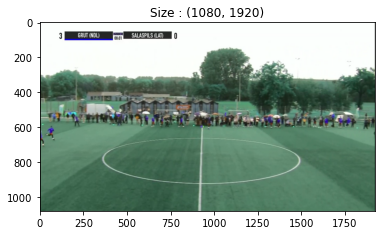

In [136]:
img = cv2.imread(IMG_PATH)
if CROPPING:
    img = img[CROPPING_HEIGHT:,:]
img_height,img_width,img_depth = img.shape

plt.imshow(img)
plt.title('Size : ({}, {})'.format(img_height,img_width))
plt.show()

In [137]:
# # Initiate SIFT detector
# sift = cv2.SIFT_create()

# # find the keypoints and descriptors with SIFT
# kp1, des1 = sift.detectAndCompute(img,None)

# img_with_kp = cv2.drawKeypoints(img, kp1, None, color = (255, 0, 0))

# plt.imshow(img_with_kp, 'gray'),plt.show()

# print(len(kp1), "keypoints")

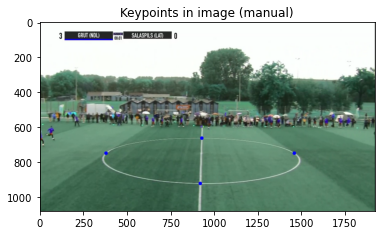

In [138]:
ptp0 = np.array([918 - CROPPING_WIDTH, 922 - CROPPING_HEIGHT])
ptp1 = np.array([378 - CROPPING_WIDTH, 749 - CROPPING_HEIGHT])
ptp2 = np.array([927 - CROPPING_WIDTH, 663 - CROPPING_HEIGHT])
ptp3 = np.array([1457 - CROPPING_WIDTH,749 - CROPPING_HEIGHT])

src_pts = np.array([ptp0, ptp1, ptp2, ptp3])

img_with_keypoints = np.copy(img)

for pt in src_pts:
    cv2.circle(img_with_keypoints, pt, radius=10, color=KEYPOINTS_COLOR, thickness=-1)

plt.imshow(img_with_keypoints, 'gray')
plt.title('Keypoints in image (manual)')
plt.show()

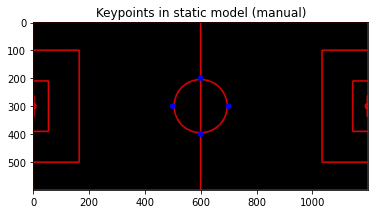

In [139]:
ptq0 = np.array([600,400])
ptq1 = np.array([500,300])
ptq2 = np.array([600,200])
ptq3 = np.array([700,300])

dst_pts = np.array([ptq0, ptq1, ptq2, ptq3])

footfield_with_keypoints = np.copy(footfield)

for pt in dst_pts:
    cv2.circle(footfield_with_keypoints, pt, radius=10, color=KEYPOINTS_COLOR, thickness=-1)

plt.imshow(footfield_with_keypoints, 'gray')
plt.title('Keypoints in static model (manual)')
plt.show()

Homography matrix H :

 [[ -0.1  -1.5 750.7]
 [  0.   -1.5 857.9]
 [  0.   -0.    1. ]]

 Inverse Homography matrix H :

 [[   -6.4     3.7  1678.5]
 [   -0.1     1.6 -1291.2]
 [   -0.      0.     -2.3]]


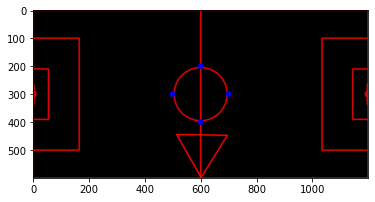

In [140]:
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
np.set_printoptions(suppress=True, precision=1)
print('Homography matrix H :\n\n {}'.format(H))

H_inv = np.linalg.inv(H)
print('\n Inverse Homography matrix H :\n\n {}'.format(H_inv))

matchesMask = mask.ravel().tolist()
pts = np.float32([ [0,0],[0,img_height-1],[img_width-1,img_height-1],[img_width-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,H)
# print(dst)

footfield_with_keypoints = cv2.polylines(footfield_with_keypoints,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
plt.figure()
plt.imshow(footfield_with_keypoints)
plt.show()

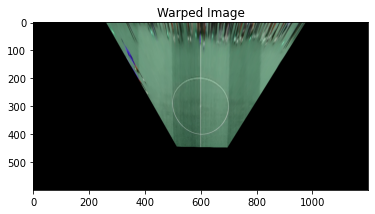

In [141]:
img_warped = cv2.warpPerspective(img,H,((footfield.shape[1], footfield.shape[0])))

plt.imshow(img_warped)
plt.title('Warped Image')
plt.show()

if RESULTS_SAVING:
    cv2.imwrite('../results/{}/img_warped.jpg'.format(FOLDER_PATH),img_warped)

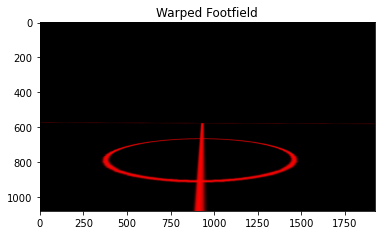

In [142]:
footfield_warped = cv2.warpPerspective(footfield,H_inv,((img.shape[1], img.shape[0])))

plt.imshow(footfield_warped)
plt.title('Warped Footfield')
plt.show()

if RESULTS_SAVING:
    cv2.imwrite('../results/{}/footfield_warped.jpg'.format(FOLDER_PATH),footfield_warped)

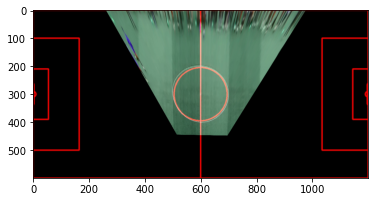

In [143]:
all_in_template = cv2.bitwise_or(img_warped, footfield)
plt.imshow(all_in_template)
plt.show()

if RESULTS_SAVING:
    cv2.imwrite('../results/{}/all_in_template.jpg'.format(FOLDER_PATH), all_in_template)    

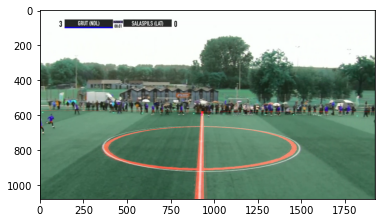

In [144]:
all_in_img = cv2.bitwise_or(img, footfield_warped)
plt.imshow(all_in_img) 
plt.show()

if RESULTS_SAVING:
    cv2.imwrite('../results/{}/all_in_img.jpg'.format(FOLDER_PATH), all_in_img)    